In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = plt.imread("./images/selena_gomez/One-Piece Cutout Swimsuit.jpg")

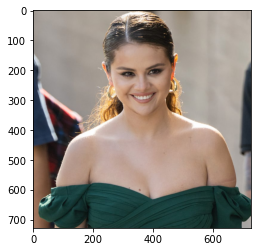

In [3]:
plt.imshow(img)

In [4]:
img.shape

(728, 728, 3)

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

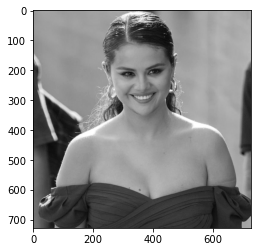

In [6]:
plt.imshow(gray,cmap="gray")

In [7]:
gray.shape

(728, 728)

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [9]:
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[240, 111, 247, 247]])

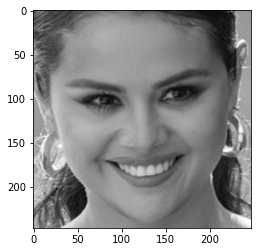

In [10]:
(x,y,w,h)=faces[0]
face_gray=gray[y:y+h,x:x+w]
plt.imshow(face_gray,cmap="gray")

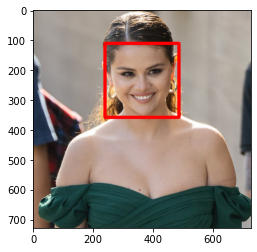

In [11]:
plt.imshow(cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10))

In [12]:
eyes=eye_cascade.detectMultiScale(face_gray)
eyes

array([[135,  71,  49,  49],
       [ 85,  91,  24,  24],
       [ 52,  79,  47,  47],
       [ 69, 156,  47,  47]])

In [13]:
for (ex,ey,ew,eh) in eyes:
        x=cv2.rectangle(face_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
x      

array([[ 93,  74,  82, ..., 152, 153, 153],
       [ 79,  90,  84, ..., 149, 149, 149],
       [ 61,  70,  79, ..., 150, 150, 150],
       ...,
       [129, 159, 171, ..., 240, 241, 240],
       [131, 164, 174, ..., 231, 231, 231],
       [132, 170, 184, ..., 221, 220, 222]], dtype=uint8)

In [14]:
for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
        roi_gray = gray[y:y+w,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes= eye_cascade.detectMultiScale(roi_gray,1.3,5)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)

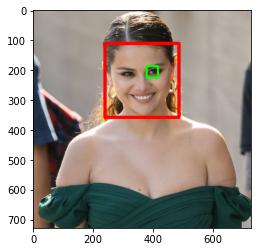

In [15]:
plt.imshow(img,cmap="gray")

In [16]:
def face_detected(path):
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

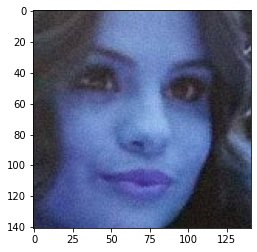

In [17]:
plt.imshow(face_detected("./images/selena_gomez/Most Followed Person on Instagram.jpg"))

In [18]:
path_to_data = "./images/"
path_to_cr_data = "./images/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir() and entry.path!='./images/cropped':
        img_dirs.append(entry.path)

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        try:
            roi_color = face_detected(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)

                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name 

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1   
        except:
            pass

ariana_grande
Generating cropped images in folder:  ./images/cropped/ariana_grande
kriti_sanon
Generating cropped images in folder:  ./images/cropped/kriti_sanon
lionel_messi
Generating cropped images in folder:  ./images/cropped/lionel_messi
ranveer_singh
Generating cropped images in folder:  ./images/cropped/ranveer_singh
Generating cropped images in folder:  ./images/cropped/ranveer_singh
Generating cropped images in folder:  ./images/cropped/ranveer_singh
selena_gomez
Generating cropped images in folder:  ./images/cropped/selena_gomez
serena_williams
Generating cropped images in folder:  ./images/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./images/cropped/virat_kohli


In [23]:
celebrity_file_names_dict={}
for i in cropped_image_dirs:
    f=[]
    celebrity_name = i.split('/')[-1]
    for j in os.scandir(i):
        f.append(j.path)
    celebrity_file_names_dict[celebrity_name]=f
celebrity_file_names_dict

{'ariana_grande': ['./images/cropped/ariana_grande\\ariana_grande1.png',
  './images/cropped/ariana_grande\\ariana_grande12.png',
  './images/cropped/ariana_grande\\ariana_grande13.png',
  './images/cropped/ariana_grande\\ariana_grande14.png',
  './images/cropped/ariana_grande\\ariana_grande15.png',
  './images/cropped/ariana_grande\\ariana_grande19.png',
  './images/cropped/ariana_grande\\ariana_grande2.png',
  './images/cropped/ariana_grande\\ariana_grande20.png',
  './images/cropped/ariana_grande\\ariana_grande21.png',
  './images/cropped/ariana_grande\\ariana_grande22.png',
  './images/cropped/ariana_grande\\ariana_grande23.png',
  './images/cropped/ariana_grande\\ariana_grande24.png',
  './images/cropped/ariana_grande\\ariana_grande25.png',
  './images/cropped/ariana_grande\\ariana_grande26.png',
  './images/cropped/ariana_grande\\ariana_grande27.png',
  './images/cropped/ariana_grande\\ariana_grande28.png',
  './images/cropped/ariana_grande\\ariana_grande29.png',
  './images/crop

In [24]:
import pywt

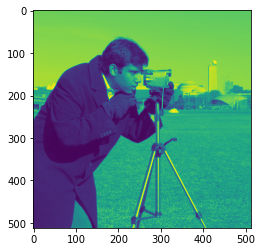

In [25]:
a=pywt.data.camera()
plt.imshow(a)

In [26]:
def w2d(img,mode="haar",level=1):
    imArray=img
    imArray=np.float32(cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY))/255
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    imArray_H=np.uint8(pywt.waverec2(coeffs_H,mode)*255)
    return imArray_H

(728, 728)

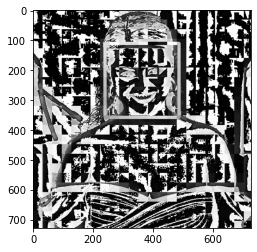

In [27]:
im_har=w2d(img,"db1",5)
plt.imshow(im_har,cmap="gray")
im_har.shape

(728, 728, 3)

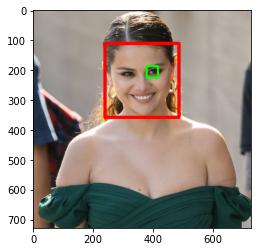

In [28]:
plt.imshow(img)
img.shape

In [29]:
celebrity_file_names_dict

{'ariana_grande': ['./images/cropped/ariana_grande\\ariana_grande1.png',
  './images/cropped/ariana_grande\\ariana_grande12.png',
  './images/cropped/ariana_grande\\ariana_grande13.png',
  './images/cropped/ariana_grande\\ariana_grande14.png',
  './images/cropped/ariana_grande\\ariana_grande15.png',
  './images/cropped/ariana_grande\\ariana_grande19.png',
  './images/cropped/ariana_grande\\ariana_grande2.png',
  './images/cropped/ariana_grande\\ariana_grande20.png',
  './images/cropped/ariana_grande\\ariana_grande21.png',
  './images/cropped/ariana_grande\\ariana_grande22.png',
  './images/cropped/ariana_grande\\ariana_grande23.png',
  './images/cropped/ariana_grande\\ariana_grande24.png',
  './images/cropped/ariana_grande\\ariana_grande25.png',
  './images/cropped/ariana_grande\\ariana_grande26.png',
  './images/cropped/ariana_grande\\ariana_grande27.png',
  './images/cropped/ariana_grande\\ariana_grande28.png',
  './images/cropped/ariana_grande\\ariana_grande29.png',
  './images/crop

In [164]:
class_dict={}
c=0
for i in celebrity_file_names_dict.keys():
    class_dict[i]=c
    c+=1
class_dict

{'ariana_grande': 0,
 'kriti_sanon': 1,
 'lionel_messi': 2,
 'ranveer_singh': 3,
 'selena_gomez': 4,
 'serena_williams': 5,
 'virat_kohli': 6}

In [165]:
X,y=[],[]
for i,j in celebrity_file_names_dict.items():
    for t in j:
        img=cv2.imread(t)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,"db1",5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[i])

In [166]:
X=np.array(X).reshape(len(X),4096).astype(float)
print(X.shape)
X

(665, 4096)


array([[155., 162., 182., ...,   3., 254.,   0.],
       [110., 170., 223., ...,  17.,  22.,  65.],
       [  8.,   8.,   8., ...,   1.,  14., 247.],
       ...,
       [ 64.,  42.,  37., ...,  31.,  30.,  22.],
       [  9.,   9.,  11., ..., 240.,   7.,  26.],
       [ 31.,  33.,  45., ...,   1.,   2.,   2.]])

In [441]:
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [442]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.26,random_state=0)

In [457]:
pipe=Pipeline([("scaler",StandardScaler()),("svc",SVC(kernel="linear",C=2,gamma=1))])

In [458]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=2, gamma=1, kernel='linear'))])

In [459]:
print("test",pipe.score(X_test,y_test))
print("train",pipe.score(X_train,y_train))

test 0.8034682080924855
train 1.0


In [361]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [10,1, 0.1],
              'degree':[1,2],
              'kernel': ['poly']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [362]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END C=0.1, degree=1, gamma=10, kernel=poly;, score=0.778 total time=   0.4s
[CV 2/5] END C=0.1, degree=1, gamma=10, kernel=poly;, score=0.788 total time=   0.4s
[CV 3/5] END C=0.1, degree=1, gamma=10, kernel=poly;, score=0.755 total time=   0.4s
[CV 4/5] END C=0.1, degree=1, gamma=10, kernel=poly;, score=0.765 total time=   0.4s
[CV 5/5] END C=0.1, degree=1, gamma=10, kernel=poly;, score=0.724 total time=   0.4s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.778 total time=   0.3s
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.788 total time=   0.4s
[CV 3/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.755 total time=   0.4s
[CV 4/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.765 total time=   0.4s
[CV 5/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.724 total time=   0.3s
[CV 1/5] END C=0.1, degree=1, gamma=0.1, kernel=poly;, score=0.778 total time=   0.5s
[CV 2/5

[CV 3/5] END C=100, degree=1, gamma=1, kernel=poly;, score=0.755 total time=   0.5s
[CV 4/5] END C=100, degree=1, gamma=1, kernel=poly;, score=0.765 total time=   0.4s
[CV 5/5] END C=100, degree=1, gamma=1, kernel=poly;, score=0.724 total time=   0.4s
[CV 1/5] END C=100, degree=1, gamma=0.1, kernel=poly;, score=0.778 total time=   0.4s
[CV 2/5] END C=100, degree=1, gamma=0.1, kernel=poly;, score=0.788 total time=   0.3s
[CV 3/5] END C=100, degree=1, gamma=0.1, kernel=poly;, score=0.755 total time=   0.4s
[CV 4/5] END C=100, degree=1, gamma=0.1, kernel=poly;, score=0.765 total time=   0.3s
[CV 5/5] END C=100, degree=1, gamma=0.1, kernel=poly;, score=0.724 total time=   0.4s
[CV 1/5] END C=100, degree=2, gamma=10, kernel=poly;, score=0.768 total time=   0.5s
[CV 2/5] END C=100, degree=2, gamma=10, kernel=poly;, score=0.798 total time=   0.5s
[CV 3/5] END C=100, degree=2, gamma=10, kernel=poly;, score=0.755 total time=   0.4s
[CV 4/5] END C=100, degree=2, gamma=10, kernel=poly;, score=0.7

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2],
                         'gamma': [10, 1, 0.1], 'kernel': ['poly']},
             verbose=3)

In [363]:
grid.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}

In [364]:
grid.best_estimator_

SVC(C=0.1, degree=2, gamma=10, kernel='poly')

In [365]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.43      0.57        28
           1       0.62      0.96      0.76        26
           2       0.93      0.90      0.92        30
           3       0.77      0.67      0.71        15
           4       0.74      0.82      0.78        45
           5       0.67      0.67      0.67         6
           6       0.95      0.87      0.91        23

    accuracy                           0.78       173
   macro avg       0.79      0.76      0.76       173
weighted avg       0.80      0.78      0.77       173



In [411]:
rnd_search = RandomizedSearchCV(SVC(), param_grid, 
n_iter =10, cv=9).fit(X_train,y_train)

In [412]:
rnd_search.best_params_

{'kernel': 'poly', 'gamma': 1, 'degree': 2, 'C': 100}

In [419]:
rnd_search.best_score_

0.7661054994388328

In [436]:
from random import randint
param = {"max_depth": [6,9, None], 
         "n_estimators":[50, 70, 100, 150], 
          'max_features': [randint(1,6)],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          'min_samples_leaf': [randint(1,4)]}

In [437]:
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, 
n_iter =10, cv=9)

In [438]:
rnd_search.fit(X_train,y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 9, None],
                                        'max_features': [3],
                                        'min_samples_leaf': [1],
                                        'n_estimators': [50, 70, 100, 150]})

In [439]:
rnd_search.best_params_

{'n_estimators': 70,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': False}

In [440]:
rnd_search.best_score_


0.6686494575383464

In [449]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68        28
           1       0.69      0.96      0.81        26
           2       1.00      0.87      0.93        30
           3       0.67      0.67      0.67        15
           4       0.75      0.87      0.80        45
           5       0.67      0.67      0.67         6
           6       1.00      0.83      0.90        23

    accuracy                           0.80       173
   macro avg       0.80      0.78      0.78       173
weighted avg       0.82      0.80      0.80       173



In [450]:
class_dict

{'ariana_grande': 0,
 'kriti_sanon': 1,
 'lionel_messi': 2,
 'ranveer_singh': 3,
 'selena_gomez': 4,
 'serena_williams': 5,
 'virat_kohli': 6}

In [451]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [452]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [453]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.794640,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.595465,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.780478,{'logisticregression__C': 1}


In [460]:
best_estimators["svm"].score(X_test,y_test)

0.8034682080924855

In [462]:
best_estimators["logistic_regression"].score(X_test,y_test)

0.7745664739884393

In [463]:
best_estimators["random_forest"].score(X_test,y_test)

0.5549132947976878

In [464]:
best_clf=best_estimators["svm"]

In [465]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[16,  5,  0,  1,  5,  1,  0],
       [ 0, 25,  0,  0,  1,  0,  0],
       [ 0,  0, 26,  1,  2,  1,  0],
       [ 0,  2,  0, 10,  3,  0,  0],
       [ 1,  4,  0,  1, 39,  0,  0],
       [ 1,  0,  0,  1,  0,  4,  0],
       [ 1,  0,  0,  1,  2,  0, 19]], dtype=int64)

Text(69.0, 0.5, 'Truth')

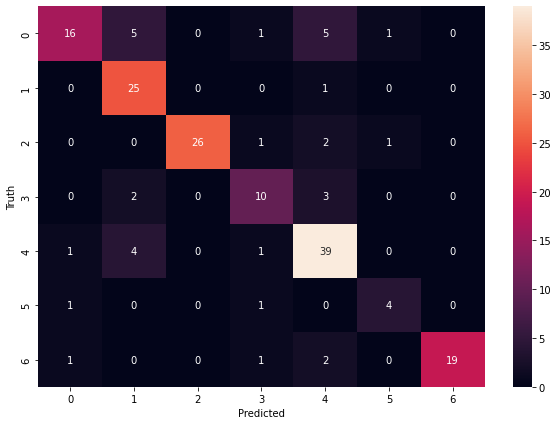

In [468]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [469]:
class_dict

{'ariana_grande': 0,
 'kriti_sanon': 1,
 'lionel_messi': 2,
 'ranveer_singh': 3,
 'selena_gomez': 4,
 'serena_williams': 5,
 'virat_kohli': 6}

In [472]:
!pip install joblib
import joblib
joblib.dump(best_clf,"saved_model.pkl")

['saved_model.pkl']

In [473]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))